# Modules

In [246]:
%%time
from feedly.api_client.session import FeedlySession
from feedly.api_client.data import StreamOptions, Streamable
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import urllib3
from time import time
from datetime import datetime
from matplotlib import pyplot
#import datetime
urllib3.disable_warnings()
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from ast import literal_eval

CPU times: user 199 µs, sys: 588 µs, total: 787 µs
Wall time: 820 µs


### Functions

In [247]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datay.corr(datax.shift(lag))

### AAPL stock

In [248]:
nasdaq = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/stock_indexes/AAPL.csv")
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-02,103.059998,103.739998,102.720001,103.300003,94.787781,53564000
1,2014-09-03,103.099998,103.199997,98.580002,98.940002,90.787048,125421000
2,2014-09-04,98.849998,100.089996,97.790001,98.120003,90.034622,85718000
3,2014-09-05,98.800003,99.389999,98.309998,98.970001,90.814583,58457000
4,2014-09-08,99.300003,99.309998,98.050003,98.360001,90.254837,46356700


In [249]:
nasdaq = nasdaq[["Date","Close"]]
nasdaq.columns = ["date","nasdaq_index_close"]
nasdaq["date"] = pd.to_datetime(nasdaq["date"])
nasdaq.head()

,date,nasdaq_index_close
0,2014-09-02,103.300003
1,2014-09-03,98.940002
2,2014-09-04,98.120003
3,2014-09-05,98.970001
4,2014-09-08,98.360001


### FAMA 5

In [250]:
#Fama-French 5 factors
fama = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/stock_indexes/controls/fama_french_5_factors.csv")
fama.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.00,-0.32,-0.01,0.15,0.012
1,19630702,0.79,-0.27,0.27,-0.07,-0.19,0.012
2,19630703,0.63,-0.17,-0.09,0.17,-0.33,0.012
3,19630705,0.40,0.08,-0.28,0.08,-0.33,0.012
4,19630708,-0.63,0.04,-0.18,-0.29,0.13,0.012


In [251]:
fama["date"] = fama['Unnamed: 0'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
fama["date"] = pd.to_datetime(fama["date"])

In [252]:
fama = fama[["date",'Mkt-RF','SMB', 'HML', 'RMW', 'CMA']]
fama.head()

,date,Mkt-RF,SMB,HML,RMW,CMA
0,1963-07-01,-0.67,0.00,-0.32,-0.01,0.15
1,1963-07-02,0.79,-0.27,0.27,-0.07,-0.19
2,1963-07-03,0.63,-0.17,-0.09,0.17,-0.33
3,1963-07-05,0.40,0.08,-0.28,0.08,-0.33
4,1963-07-08,-0.63,0.04,-0.18,-0.29,0.13


### LIBOR USD

In [253]:
libor = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/stock_indexes/controls/LIBOR USD.csv")

In [254]:
libor.head()

,Date,Week day,ON,1W,1M,2M,3M,6M,12M
0,23.08.2019,Fri,2.08838,2.13400,2.13950,2.17138,2.14438,2.08013,2.02850
1,22.08.2019,Thu,2.09363,2.12713,2.14525,2.15938,2.13225,2.04250,1.97325
2,21.08.2019,Wed,2.09300,2.13988,2.16663,2.16975,2.14763,2.02538,1.95425
3,20.08.2019,Tue,2.09700,2.13363,2.17000,2.16600,2.14950,2.02363,1.94850
4,19.08.2019,Mon,2.09538,2.11738,2.16863,2.16663,2.15150,2.02913,1.95325


In [255]:
def format_date(x):
    return datetime.strptime(x, "%d.%m.%Y").strftime('%Y-%m-%d')

In [256]:
libor["Date"] = libor["Date"].apply(format_date)
libor["date"] = pd.to_datetime(libor["Date"])
libor.head()

,Date,Week day,ON,1W,1M,2M,3M,6M,12M,date
0,2019-08-23,Fri,2.08838,2.13400,2.13950,2.17138,2.14438,2.08013,2.02850,2019-08-23
1,2019-08-22,Thu,2.09363,2.12713,2.14525,2.15938,2.13225,2.04250,1.97325,2019-08-22
2,2019-08-21,Wed,2.09300,2.13988,2.16663,2.16975,2.14763,2.02538,1.95425,2019-08-21
3,2019-08-20,Tue,2.09700,2.13363,2.17000,2.16600,2.14950,2.02363,1.94850,2019-08-20
4,2019-08-19,Mon,2.09538,2.11738,2.16863,2.16663,2.15150,2.02913,1.95325,2019-08-19


In [257]:
libor = libor[["date","1M","3M"]]
libor.columns = ["date","libor_1M","libor_3M"]
libor["risk_premium"] = libor["libor_3M"] - libor["libor_1M"]
libor.head()

,date,libor_1M,libor_3M,risk_premium
0,2019-08-23,2.13950,2.14438,0.00488
1,2019-08-22,2.14525,2.13225,-0.01300
2,2019-08-21,2.16663,2.14763,-0.01900
3,2019-08-20,2.17000,2.14950,-0.02050
4,2019-08-19,2.16863,2.15150,-0.01713


## USD Index

In [258]:
usd_index = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/stock_indexes/controls/USD_fluctuations.csv")
usd_index.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-03-16,83.610001,83.650002,83.029999,83.230003,83.230003,0.0
1,2007-03-18,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-03-19,83.169998,83.470001,83.150002,83.389999,83.389999,0.0
3,2007-03-20,83.309998,83.500000,83.040001,83.110001,83.110001,0.0
4,2007-03-21,83.080002,83.260002,82.739998,82.769997,82.769997,0.0


In [259]:
usd_index = usd_index[["Date","Close"]]
usd_index.columns = ["date","usd_index_close"]
usd_index["date"] = pd.to_datetime(usd_index["date"])
usd_index.head()

,date,usd_index_close
0,2007-03-16,83.230003
1,2007-03-18,NaN
2,2007-03-19,83.389999
3,2007-03-20,83.110001
4,2007-03-21,82.769997


### Sentiment index

In [260]:
def convert_pred(x):
    if x[1] == "1":
        return "label_negative"
    elif x[6] == "1":
        return "label_neutral"
    elif x[11] == "1":
        return "label_positive"
    else: #row 521 and 554
        return "no label"

In [261]:
def convert_pred_proba(x):
    if x == 0:
        return "label_negative"
    elif x == 1:
        return "label_neutral"
    elif x == 2:
        return "label_positive"
    else: #row 521 and 554
        return "no label"


In [262]:
results = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/results/sentiment_indices_aapl/aapl_sentiment_bert.csv")
results.head(n=50)

,Unnamed: 0,Unnamed: 0.1,article_time,Text,pred_proba
0,0,0,2017-01-03 10:26:00,"Why Apple, Stock Gained 11% in 2016.","[0.09973956644535065, 0.2574954330921173, 0.79..."
1,1,1,2017-01-03 10:26:00,"Apple(NASDAQ: AAPL) finished 2016 strong, gain...","[0.15682728588581085, 0.1222851425409317, 0.84..."
2,2,2,2017-01-03 10:26:00,The nice increase toward the end of the year h...,"[0.20763783156871796, 0.09087919443845749, 0.8..."
3,3,3,2017-01-03 10:26:00,"While the increase is notable, investors shoul...","[0.0588444322347641, 0.4770902991294861, 0.631..."
4,4,4,2017-01-03 10:26:00,Image source: Apple.,"[0.09454485028982162, 0.946122407913208, 0.057..."
5,5,5,2017-01-03 10:26:00,Apple's gain for the year didn't come without ...,"[0.16714470088481903, 0.25863492488861084, 0.3..."
6,6,6,2017-01-03 10:26:00,"In May, the stock had fallen about 12.5% as in...","[0.7049775719642639, 0.1684236228466034, 0.234..."
7,7,7,2017-01-03 10:26:00,Concern particularly mounted after Apple repor...,"[0.7133515477180481, 0.1198204979300499, 0.315..."
8,8,8,2017-01-03 10:26:00,Investors also questioned the company's abilit...,"[0.4864318072795868, 0.13550850749015808, 0.32..."
9,9,9,2017-01-03 10:26:00,"But as the year went on, signs that Apple's iP...","[0.21985149383544922, 0.1764223575592041, 0.46..."


In [263]:
results["pred_proba"] = results["pred_proba"].apply(literal_eval)
results.head()

,Unnamed: 0,Unnamed: 0.1,article_time,Text,pred_proba
0,0,0,2017-01-03 10:26:00,"Why Apple, Stock Gained 11% in 2016.","[0.09973956644535065, 0.2574954330921173, 0.79..."
1,1,1,2017-01-03 10:26:00,"Apple(NASDAQ: AAPL) finished 2016 strong, gain...","[0.15682728588581085, 0.1222851425409317, 0.84..."
2,2,2,2017-01-03 10:26:00,The nice increase toward the end of the year h...,"[0.20763783156871796, 0.09087919443845749, 0.8..."
3,3,3,2017-01-03 10:26:00,"While the increase is notable, investors shoul...","[0.0588444322347641, 0.4770902991294861, 0.631..."
4,4,4,2017-01-03 10:26:00,Image source: Apple.,"[0.09454485028982162, 0.946122407913208, 0.057..."


In [264]:
results["pred_proba"] = results["pred_proba"].apply(np.argmax)
results.head()

,Unnamed: 0,Unnamed: 0.1,article_time,Text,pred_proba
0,0,0,2017-01-03 10:26:00,"Why Apple, Stock Gained 11% in 2016.",2
1,1,1,2017-01-03 10:26:00,"Apple(NASDAQ: AAPL) finished 2016 strong, gain...",2
2,2,2,2017-01-03 10:26:00,The nice increase toward the end of the year h...,2
3,3,3,2017-01-03 10:26:00,"While the increase is notable, investors shoul...",2
4,4,4,2017-01-03 10:26:00,Image source: Apple.,1


In [265]:
results["pred_proba"] = results["pred_proba"].apply(convert_pred_proba)
#results["pred"] = results["pred"].apply(convert_pred)

In [266]:
results = results[["article_time","Text","pred_proba"]]
results.head()

,article_time,Text,pred_proba
0,2017-01-03 10:26:00,"Why Apple, Stock Gained 11% in 2016.",label_positive
1,2017-01-03 10:26:00,"Apple(NASDAQ: AAPL) finished 2016 strong, gain...",label_positive
2,2017-01-03 10:26:00,The nice increase toward the end of the year h...,label_positive
3,2017-01-03 10:26:00,"While the increase is notable, investors shoul...",label_positive
4,2017-01-03 10:26:00,Image source: Apple.,label_neutral


In [269]:
results["article_time"] = pd.to_datetime(results["article_time"])
results["article_time"][0]

Timestamp('2017-01-03 10:26:00')

In [267]:
results["pred_proba"].value_counts(dropna=False)

label_neutral     90849
label_positive    32806
label_negative    23534
Name: pred_proba, dtype: int64

In [22]:
results["pred_proba"].value_counts(dropna=False)

label_neutral     90849
label_positive    32806
label_negative    23534
Name: pred_proba, dtype: int64

In [270]:
def year(x):
    return x.year

In [272]:
results["article_time"] = pd.to_datetime(results["article_time"])
results["year"] = results["article_time"].apply(year)
results_2018 = results.loc[results["year"]==2018]
results_2018["pred_proba"].value_counts(dropna=False)

label_neutral     40604
label_positive    15710
label_negative    11431
Name: pred_proba, dtype: int64

In [275]:
results_2018["Text"][28125]

' Apple is doomed, he says, … most people buying Apple stock are buying into a memory.'

In [24]:
def hour(x):
    return x.hour

In [25]:
results["hour"] = results["article_time"].apply(hour)

In [26]:
#keep articles published after end trading time
#results = results.loc[results['hour'] >16]
#results = results.reset_index(drop=True)

In [27]:
def time_format(x):
    return x.replace(hour=0, minute=0, second=0, microsecond=0)

In [28]:
results["article_time"] = results["article_time"].apply(time_format)
results.head()

,article_time,Text,pred_proba,hour
0,2017-01-03,"Why Apple, Stock Gained 11% in 2016.",label_positive,10
1,2017-01-03,"Apple(NASDAQ: AAPL) finished 2016 strong, gain...",label_positive,10
2,2017-01-03,The nice increase toward the end of the year h...,label_positive,10
3,2017-01-03,"While the increase is notable, investors shoul...",label_positive,10
4,2017-01-03,Image source: Apple.,label_neutral,10


In [29]:
inter = results.groupby(['article_time','pred_proba']).size().reset_index(name='counts')
results_final = inter.pivot_table('counts', ['article_time'], 'pred_proba')
results_final = results_final.fillna(0)
results_final.head()

pred_proba,label_negative,label_neutral,label_positive
article_time,,,
2017-01-03,3.0,30.0,8.0
2017-01-04,1.0,32.0,9.0
2017-01-05,2.0,107.0,26.0
2017-01-06,4.0,27.0,5.0
2017-01-08,17.0,19.0,14.0


In [30]:
results_final["sentiment_index"] = (results_final["label_positive"] - results_final["label_negative"])/(results_final["label_positive"] + results_final["label_neutral"] + results_final["label_negative"])
results_final.head()

pred_proba,label_negative,label_neutral,label_positive,sentiment_index
article_time,,,,
2017-01-03,3.0,30.0,8.0,0.121951
2017-01-04,1.0,32.0,9.0,0.190476
2017-01-05,2.0,107.0,26.0,0.177778
2017-01-06,4.0,27.0,5.0,0.027778
2017-01-08,17.0,19.0,14.0,-0.060000


In [31]:
results_final["date"] = results_final.index
results_final = results_final.reset_index(drop=True)

In [32]:
results_final = results_final[["date","sentiment_index"]]
results_final.head()

pred_proba,date,sentiment_index
0,2017-01-03,0.121951
1,2017-01-04,0.190476
2,2017-01-05,0.177778
3,2017-01-06,0.027778
4,2017-01-08,-0.060000


In [33]:
max(results_final["date"])

Timestamp('2019-08-27 00:00:00')

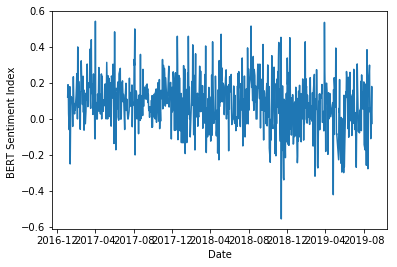

In [34]:
import matplotlib.pyplot as plt
plt.plot(results_final["date"], results_final["sentiment_index"])
plt.ylabel('BERT Sentiment Index ')
plt.xlabel('Date')
plt.savefig('/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/results/graph/sentiment_index.png')

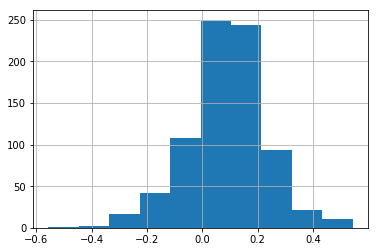

In [35]:
results_final["sentiment_index"].hist()

In [36]:
results_final.columns = ['date','sentiment_index_bert']

In [37]:
results_final_svm = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/results/sentiment_indices_aapl/aapl_sentiment_tfidf_svm.csv")
results_final_svm.head()

,Unnamed: 0,date,sentiment_index
0,0,2017-01-03,0.121951
1,1,2017-01-04,0.285714
2,2,2017-01-05,0.111111
3,3,2017-01-06,0.138889
4,4,2017-01-08,0.160000


In [38]:
#keep only 2018 for now
#results_final_svm["date"] = pd.to_datetime(results_final_svm["date"])
#results_final_svm["year"] = results_final_svm["date"].apply(year)
#results_final_svm = results_final_svm.loc[results_final_svm["year"]==2018]
#results_final_svm = results_final_svm.reset_index(drop=True)
#results_final_svm.head()

In [39]:
results_final_svm = results_final_svm[["date","sentiment_index"]]
results_final_svm.columns = ["date","sentiment_index_svm"]

In [40]:
results_final_dico = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/results/sentiment_indices_aapl/aapl_sentiment_dico.csv")
results_final_dico.head()

,Unnamed: 0,date,sentiment_index
0,0,2017-01-03,-0.073171
1,1,2017-01-04,0.000000
2,2,2017-01-05,0.081481
3,3,2017-01-06,-0.055556
4,4,2017-01-08,-0.060000


In [41]:
#results_final_dico["date"] = pd.to_datetime(results_final_dico["date"])

In [42]:
def year(x):
    return x.year

In [43]:
#results_final_dico["year"] = results_final_dico["date"].apply(year)


In [44]:
#results_final_dico = results_final_dico.loc[results_final_dico["year"]==2018]

In [45]:
results_final_dico = results_final_dico.reset_index(drop=True)
results_final_dico = results_final_dico[["date","sentiment_index"]]
results_final_dico.columns = ["date","sentiment_index_dico"]
results_final_dico.head()

,date,sentiment_index_dico
0,2017-01-03,-0.073171
1,2017-01-04,0.000000
2,2017-01-05,0.081481
3,2017-01-06,-0.055556
4,2017-01-08,-0.060000


### Merge

In [46]:
#df = pd.concat([nasdaq,fama,libor,usd_index],sort=True)
#df = df.reset_index(drop=True)
#df.head()

In [47]:
# Setting the timestamp as the index
nasdaq.set_index('date', inplace=True)
fama.set_index('date', inplace=True)
libor.set_index('date', inplace=True)
usd_index.set_index('date', inplace=True)
results_final.set_index('date',inplace=True)
results_final_svm.set_index('date',inplace=True)
results_final_dico.set_index('date',inplace=True)

# You can convert timestamps to dates but it's not mandatory I think
nasdaq.index = pd.to_datetime(nasdaq.index, unit='s')
fama.index = pd.to_datetime(fama.index, unit='s')
libor.index = pd.to_datetime(libor.index, unit='s')
usd_index.index = pd.to_datetime(usd_index.index, unit='s')
results_final.index = pd.to_datetime(results_final.index, unit='s')
results_final_svm.index = pd.to_datetime(results_final.index, unit='s')
results_final_dico.index = pd.to_datetime(results_final.index, unit='s')

# Just perform a join and that's it
result = nasdaq.join(fama, how='outer').join(libor, how='outer').join(usd_index, how='outer').join(results_final,how="outer").join(results_final_svm,how="outer").join(results_final_dico,how="outer")
result.head()

,nasdaq_index_close,Mkt-RF,SMB,HML,RMW,CMA,libor_1M,libor_3M,risk_premium,usd_index_close,sentiment_index_bert,sentiment_index_svm,sentiment_index_dico
date,,,,,,,,,,,,,
1963-07-01,NaN,-0.67,0.00,-0.32,-0.01,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-02,NaN,0.79,-0.27,0.27,-0.07,-0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-03,NaN,0.63,-0.17,-0.09,0.17,-0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-05,NaN,0.40,0.08,-0.28,0.08,-0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-08,NaN,-0.63,0.04,-0.18,-0.29,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def weekday(x):
    return x.weekday()

In [49]:
df = result.loc[result.index.year ==2018]
#df["date"] = df.index
#df["year"] = df["date"].apply(year)
#df = df.loc[df["year"]!=2019]
df["date"] = df.index
df["weekday"] = df["date"].apply(weekday)
df["weekday"].value_counts(dropna=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


6    52
4    52
3    52
2    52
0    52
1    51
5    27
Name: weekday, dtype: int64

In [50]:
df.head()

,nasdaq_index_close,Mkt-RF,SMB,HML,RMW,CMA,libor_1M,libor_3M,risk_premium,usd_index_close,sentiment_index_bert,sentiment_index_svm,sentiment_index_dico,date,weekday
date,,,,,,,,,,,,,,,
2018-01-02,172.259995,0.85,0.31,-0.22,-0.46,0.22,1.56175,1.69693,0.13518,91.849998,0.115385,0.128205,-0.076923,2018-01-02,1
2018-01-03,172.229996,0.59,-0.48,-0.21,-0.76,-0.07,1.55688,1.69593,0.13905,92.160004,-0.033333,0.200000,-0.133333,2018-01-03,2
2018-01-04,173.029999,0.42,-0.23,0.24,-0.04,0.30,1.55500,1.70381,0.14881,91.849998,-0.133333,0.066667,-0.200000,2018-01-04,3
2018-01-05,175.000000,0.66,-0.36,-0.26,0.40,-0.37,1.55250,1.70393,0.15143,91.949997,0.036145,0.096386,-0.024096,2018-01-05,4
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296296,0.049383,0.123457,2018-01-06,5


In [51]:
#all values for saturdays and sunday are missing
df=df.loc[df["weekday"]!=6]
df=df.loc[df["weekday"]!=5]
df.head()

,nasdaq_index_close,Mkt-RF,SMB,HML,RMW,CMA,libor_1M,libor_3M,risk_premium,usd_index_close,sentiment_index_bert,sentiment_index_svm,sentiment_index_dico,date,weekday
date,,,,,,,,,,,,,,,
2018-01-02,172.259995,0.85,0.31,-0.22,-0.46,0.22,1.56175,1.69693,0.13518,91.849998,0.115385,0.128205,-0.076923,2018-01-02,1
2018-01-03,172.229996,0.59,-0.48,-0.21,-0.76,-0.07,1.55688,1.69593,0.13905,92.160004,-0.033333,0.200000,-0.133333,2018-01-03,2
2018-01-04,173.029999,0.42,-0.23,0.24,-0.04,0.30,1.55500,1.70381,0.14881,91.849998,-0.133333,0.066667,-0.200000,2018-01-04,3
2018-01-05,175.000000,0.66,-0.36,-0.26,0.40,-0.37,1.55250,1.70393,0.15143,91.949997,0.036145,0.096386,-0.024096,2018-01-05,4
2018-01-08,174.350006,0.19,-0.20,0.07,-0.11,0.03,1.55375,1.70802,0.15427,92.330002,0.000000,0.000000,-0.095238,2018-01-08,0


In [52]:
df.shape

(259, 15)

In [53]:
df.loc[df["nasdaq_index_close"].isnull()]["weekday"].value_counts(dropna=False)

0    4
2    2
4    1
3    1
Name: weekday, dtype: int64

In [54]:
df_final = df[['nasdaq_index_close', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'libor_1M', 'risk_premium', 'usd_index_close',"sentiment_index_bert","sentiment_index_svm","sentiment_index_dico"]]

## Descriptive stats

In [55]:
df_final.head()

,nasdaq_index_close,Mkt-RF,SMB,HML,RMW,CMA,libor_1M,risk_premium,usd_index_close,sentiment_index_bert,sentiment_index_svm,sentiment_index_dico
date,,,,,,,,,,,,
2018-01-02,172.259995,0.85,0.31,-0.22,-0.46,0.22,1.56175,0.13518,91.849998,0.115385,0.128205,-0.076923
2018-01-03,172.229996,0.59,-0.48,-0.21,-0.76,-0.07,1.55688,0.13905,92.160004,-0.033333,0.200000,-0.133333
2018-01-04,173.029999,0.42,-0.23,0.24,-0.04,0.30,1.55500,0.14881,91.849998,-0.133333,0.066667,-0.200000
2018-01-05,175.000000,0.66,-0.36,-0.26,0.40,-0.37,1.55250,0.15143,91.949997,0.036145,0.096386,-0.024096
2018-01-08,174.350006,0.19,-0.20,0.07,-0.11,0.03,1.55375,0.15427,92.330002,0.000000,0.000000,-0.095238


In [56]:
df_final.shape

(259, 12)

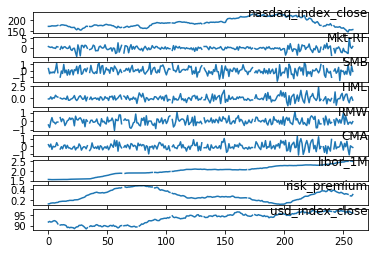

In [57]:
# specify columns to plot
values = df_final.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df_final.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

## Check correlations

In [58]:
df_final.head()

,nasdaq_index_close,Mkt-RF,SMB,HML,RMW,CMA,libor_1M,risk_premium,usd_index_close,sentiment_index_bert,sentiment_index_svm,sentiment_index_dico
date,,,,,,,,,,,,
2018-01-02,172.259995,0.85,0.31,-0.22,-0.46,0.22,1.56175,0.13518,91.849998,0.115385,0.128205,-0.076923
2018-01-03,172.229996,0.59,-0.48,-0.21,-0.76,-0.07,1.55688,0.13905,92.160004,-0.033333,0.200000,-0.133333
2018-01-04,173.029999,0.42,-0.23,0.24,-0.04,0.30,1.55500,0.14881,91.849998,-0.133333,0.066667,-0.200000
2018-01-05,175.000000,0.66,-0.36,-0.26,0.40,-0.37,1.55250,0.15143,91.949997,0.036145,0.096386,-0.024096
2018-01-08,174.350006,0.19,-0.20,0.07,-0.11,0.03,1.55375,0.15427,92.330002,0.000000,0.000000,-0.095238


### Between sentiments

In [59]:
df_final["sentiment_index_bert"].corr(df_final["sentiment_index_svm"])

0.7563659002524442

In [60]:
df_final["sentiment_index_bert"].corr(df_final["sentiment_index_dico"])

0.7272928232223154

In [61]:
df_final["sentiment_index_svm"].corr(df_final["sentiment_index_dico"])

0.5976797951983173

### Between sentiments indices and controls

In [62]:
for i in df_final.columns.tolist()[1:-3]:
    print(i,df_final["sentiment_index_bert"].corr(df_final[i]))

Mkt-RF 0.2971673042900725
SMB -0.0018127722815489858
HML -0.23513251315716016
RMW -0.11841045768702825
CMA -0.28571087534411066
libor_1M -0.17196750353270357
risk_premium -0.10099530079382903
usd_index_close -0.06573392825151474


In [63]:
for i in df_final.columns.tolist()[1:-3]:
    print(i,df_final["sentiment_index_svm"].corr(df_final[i]))

Mkt-RF 0.2930928053097214
SMB -0.025223136655386655
HML -0.21536775767150654
RMW -0.11942877108033786
CMA -0.26111886278431695
libor_1M -0.17758123944713458
risk_premium -0.08759339777037724
usd_index_close -0.06910339157506583


In [64]:
for i in df_final.columns.tolist()[1:-3]:
    print(i,df_final["sentiment_index_dico"].corr(df_final[i]))

Mkt-RF 0.2568385043369269
SMB 0.010241361039269918
HML -0.24013844303703444
RMW -0.08729242582666026
CMA -0.22704864458739718
libor_1M -0.23300304380901501
risk_premium -0.10883013341553299
usd_index_close -0.1250859648865231


### Between controls

In [65]:
for i in df_final.columns.tolist()[1:-3]:
    for j in df_final.columns.tolist()[1:-3]:
        print(i,j,df_final[i].corr(df_final[j]))

Mkt-RF Mkt-RF 0.9999999999999998
Mkt-RF SMB -0.06402256238960136
Mkt-RF HML -0.3545861101059003
Mkt-RF RMW -0.21094381677563498
Mkt-RF CMA -0.45495888370423004
Mkt-RF libor_1M -0.13479567108757085
Mkt-RF risk_premium 0.010925527948597897
Mkt-RF usd_index_close -0.048642364963120785
SMB Mkt-RF -0.06402256238960136
SMB SMB 1.0
SMB HML -0.17028548660100631
SMB RMW -0.12177155773690376
SMB CMA -0.06170875993579056
SMB libor_1M -0.1022411411307253
SMB risk_premium 0.12427897193467281
SMB usd_index_close -0.09900842192685037
HML Mkt-RF -0.35458611010590024
HML SMB -0.17028548660100631
HML HML 1.0
HML RMW 0.006873291810285078
HML CMA 0.697694138533531
HML libor_1M 0.04044328632057001
HML risk_premium -0.03611488124177741
HML usd_index_close 0.009550563700953188
RMW Mkt-RF -0.21094381677563498
RMW SMB -0.12177155773690376
RMW HML 0.006873291810285076
RMW RMW 1.0
RMW CMA 0.08554055294440269
RMW libor_1M 0.0336687320631118
RMW risk_premium -0.06458655301060234
RMW usd_index_close 0.0402871389216

### Between X and y

In [66]:
for i in df_final.columns.tolist()[1:]:
    print(i,df_final["nasdaq_index_close"].corr(df_final[i]))

Mkt-RF 0.07458946344364954
SMB -0.08397895995137532
HML 0.004556640575556488
RMW 0.03266069449040328
CMA 0.07627733531682536
libor_1M 0.427827333915196
risk_premium -0.5481124721974167
usd_index_close 0.508197278448093
sentiment_index_bert 0.15936016144866938
sentiment_index_svm 0.11001253846598284
sentiment_index_dico 0.12042776392885739


In [67]:
for i in df_final.columns.tolist()[1:]:
    print(i,crosscorr(df[i],df["nasdaq_index_close"],1))

Mkt-RF 0.07484683375096239
SMB -0.09219644218442802
HML -0.008039569290433713
RMW 0.03153843221052745
CMA 0.07909380632373968
libor_1M 0.42555042659366143
risk_premium -0.5460588517472856
usd_index_close 0.5107894466279148
sentiment_index_bert 0.15467875392669556
sentiment_index_svm 0.09566818973200228
sentiment_index_dico 0.09647711770976641


In [68]:
for i in df_final.columns.tolist()[1:]:
    print(i,crosscorr(df[i],df["nasdaq_index_close"],2))

Mkt-RF 0.06113648632892215
SMB -0.0676169858571056
HML 0.008532154617919136
RMW 0.04699817110168819
CMA 0.08264305714824717
libor_1M 0.4253566114594264
risk_premium -0.5485005198203359
usd_index_close 0.5106568193679728
sentiment_index_bert 0.1575494924893925
sentiment_index_svm 0.07101930503730056
sentiment_index_dico 0.0847329214243419


## Prediction

In [69]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [70]:
df_final_1 = df_final
scaler = MinMaxScaler(feature_range=(0, 1))
df_final_1[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'libor_1M','risk_premium', 'usd_index_close']] = scaler.fit_transform(df_final_1[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'libor_1M','risk_premium', 'usd_index_close']])
df_final_1.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

,nasdaq_index_close,Mkt-RF,SMB,HML,RMW,CMA,libor_1M,risk_premium,usd_index_close,sentiment_index_bert,sentiment_index_svm,sentiment_index_dico
date,,,,,,,,,,,,
2018-01-02,172.259995,0.536854,0.675958,0.366584,0.292237,0.552743,0.009537,0.018353,0.365663,0.115385,0.128205,-0.076923
2018-01-03,172.229996,0.508251,0.400697,0.369077,0.155251,0.430380,0.004516,0.029846,0.400223,-0.033333,0.200000,-0.133333
2018-01-04,173.029999,0.489549,0.487805,0.481297,0.484018,0.586498,0.002578,0.058831,0.365663,-0.133333,0.066667,-0.200000
2018-01-05,175.000000,0.515952,0.442509,0.356608,0.684932,0.303797,0.000000,0.066611,0.376811,0.036145,0.096386,-0.024096
2018-01-08,174.350006,0.464246,0.498258,0.438903,0.452055,0.472574,0.001289,0.075045,0.419175,0.000000,0.000000,-0.095238


In [71]:
# load dataset
values = df_final_1.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaled = df_final_1
# frame as supervised learning
reframed = series_to_supervised(scaled, 2, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),...,var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t)
date,,,,,,,,,,,,,,,,,,,,,
2018-01-04,172.259995,0.536854,0.675958,0.366584,0.292237,0.552743,0.009537,0.018353,0.365663,0.115385,...,0.487805,0.481297,0.484018,0.586498,0.002578,0.058831,0.365663,-0.133333,0.066667,-0.200000
2018-01-05,172.229996,0.508251,0.400697,0.369077,0.155251,0.430380,0.004516,0.029846,0.400223,-0.033333,...,0.442509,0.356608,0.684932,0.303797,0.000000,0.066611,0.376811,0.036145,0.096386,-0.024096
2018-01-08,173.029999,0.489549,0.487805,0.481297,0.484018,0.586498,0.002578,0.058831,0.365663,-0.133333,...,0.498258,0.438903,0.452055,0.472574,0.001289,0.075045,0.419175,0.000000,0.000000,-0.095238
2018-01-09,175.000000,0.515952,0.442509,0.356608,0.684932,0.303797,0.000000,0.066611,0.376811,0.036145,...,0.439024,0.413965,0.433790,0.434599,0.001289,0.064800,0.441471,0.212500,0.125000,0.087500
2018-01-10,174.350006,0.464246,0.498258,0.438903,0.452055,0.472574,0.001289,0.075045,0.419175,0.000000,...,0.616725,0.566085,0.347032,0.459916,0.001289,0.078282,0.419175,0.276699,0.179612,0.140777


In [72]:
# The individual AAPL stock return is defined by its log return,
reframed["log_return(t)"] = np.log(reframed["var1(t)"]/reframed["var1(t-1)"])
reframed["log_return(t-1)"] = np.log(reframed["var1(t-1)"]/reframed["var1(t-2)"])

### Correlation after normalization

### BERT

In [73]:
reframed["log_return(t)"].corr(reframed["var10(t-2)"])

0.12356429588202324

In [74]:
reframed["log_return(t)"].corr(reframed["var10(t-1)"])

0.044312833483600766

In [75]:
reframed["log_return(t)"].corr(reframed["var10(t)"])

0.36498060386013653

### SVM

In [76]:
reframed["log_return(t)"].corr(reframed["var11(t-2)"])

0.06073496121101385

In [77]:
reframed["log_return(t)"].corr(reframed["var11(t-1)"])

-0.039976112842683084

In [78]:
reframed["log_return(t)"].corr(reframed["var11(t)"])

0.2968317790577429

### Dico

In [79]:
reframed["log_return(t)"].corr(reframed["var12(t-2)"])

0.05411608734753142

In [80]:
reframed["log_return(t)"].corr(reframed["var12(t-1)"])

-0.015257976777626029

In [81]:
reframed["log_return(t)"].corr(reframed["var12(t)"])

0.2621904503318708

### Prepare training data

In [276]:
from sklearn.model_selection import train_test_split
#without sentiment
reframed_controls_without = reframed[['log_return(t-1)','var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)',
       'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)',
       'var7(t-1)', 'var8(t-1)', 'var9(t-1)']]
X_train_without, X_test_without, y_train, y_test = train_test_split(reframed_controls_without, reframed["log_return(t)"], test_size=0.2, random_state=42)
#with all
reframed_controls_with = reframed[['log_return(t-1)','var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)','var10(t-2)','var11(t-2)',
       'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)',
       'var7(t-1)', 'var8(t-1)', 'var9(t-1)','var10(t-1)','var11(t-1)']]
X_train_with, X_test_with, y_train, y_test = train_test_split(reframed_controls_without, reframed["log_return(t)"], test_size=0.2, random_state=42)


#only with sentiment
reframed_controls_only_with = reframed[['log_return(t-1)', 'var10(t-2)',#, 'var12(t-2)','var10(t-2)',
        'var10(t-1)']]#, 'var10(t-1)','var12(t-1)']]
X_train_only_with, X_test_only_with, y_train, y_test = train_test_split(reframed_controls_only_with, reframed["log_return(t)"], test_size=0.2, random_state=42)

reframed_controls_only_with_svm = reframed[['log_return(t-1)', 'var11(t-2)',#, 'var12(t-2)','var10(t-2)',
        'var11(t-1)']]#, 'var10(t-1)','var12(t-1)']]
X_train_only_with_svm, X_test_only_with_svm, y_train, y_test = train_test_split(reframed_controls_only_with_svm, reframed["log_return(t)"], test_size=0.2, random_state=42)

#controls and dico
reframed_controls_dico = reframed[['log_return(t-1)','var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)','var12(t-2)',
       'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)',
       'var7(t-1)', 'var8(t-1)', 'var9(t-1)','var12(t-1)']]
X_train_dico, X_test_dico, y_train, y_test = train_test_split(reframed_controls_dico, reframed["log_return(t)"], test_size=0.2, random_state=42)

#controls and svm
reframed_controls_svm = reframed[['log_return(t-1)','var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)','var11(t-2)',
       'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)',
       'var7(t-1)', 'var8(t-1)', 'var9(t-1)','var11(t-1)']]
X_train_svm, X_test_svm, y_train, y_test = train_test_split(reframed_controls_svm, reframed["log_return(t)"], test_size=0.2, random_state=42)

#controls and bert
reframed_controls_bert = reframed[['log_return(t-1)','var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)','var10(t-2)',
       'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)',
       'var7(t-1)', 'var8(t-1)', 'var9(t-1)','var10(t-1)']]
X_train_bert, X_test_bert, y_train, y_test = train_test_split(reframed_controls_bert, reframed["log_return(t)"], test_size=0.2, random_state=42)


#relevant controls and sentiment 
reframed_controls_denoised = reframed[['log_return(t-1)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)','var10(t-2)',
       'var7(t-1)', 'var8(t-1)', 'var9(t-1)','var10(t-1)']]
X_train_denoised, X_test_denoised, y_train, y_test = train_test_split(reframed_controls_bert, reframed["log_return(t)"], test_size=0.2, random_state=42)


### Without the sentiment variable

In [604]:
train_X_without = X_train_without.values
test_X_without = X_test_without.values
#reshape 3D for LSTM input
train_X_without = train_X_without.reshape((train_X_without.shape[0], 1, train_X_without.shape[1]))
test_X_without = test_X_without.reshape((test_X_without.shape[0], 1, test_X_without.shape[1]))

In [607]:
rmse_without=[]
for i in range(100):
    model_without = Sequential()
    model_without.add(LSTM(50, input_shape=(train_X_without.shape[1], train_X_without.shape[2])))
    model_without.add(Dense(1))
    model_without.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_without.fit(train_X_without, y_train, epochs=100, batch_size=100, validation_data=(test_X_without, y_test),verbose=0, shuffle=False)
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()
    yhat_without = model_without.predict(test_X_without)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    rmse_i = sqrt(mean_squared_error(y_test, yhat_without))
    rmse_without.append(rmse_i)
    #if i % 10 == 0:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [608]:
np.mean(rmse_without)

0.02069066692791314

In [611]:
rmse_without_mean = np.mean(rmse_without)

### Only with the sentiment variable: BERT

In [78]:
train_X_only_with = X_train_only_with.values
test_X_only_with = X_test_only_with.values
#reshape 3D for LSTM input
train_X_only_with = train_X_only_with.reshape((train_X_only_with.shape[0], 1, train_X_only_with.shape[1]))
test_X_only_with = test_X_only_with.reshape((test_X_only_with.shape[0], 1, test_X_only_with.shape[1]))

In [79]:
rmse_only_with=[]
for i in range(100):
    model_only_with = Sequential()
    model_only_with.add(LSTM(50, input_shape=(train_X_only_with.shape[1], train_X_only_with.shape[2])))
    model_only_with.add(Dense(1))
    model_only_with.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_only_with.fit(train_X_only_with, y_train, epochs=100, batch_size=100, validation_data=(test_X_only_with, y_test),verbose=0, shuffle=False)
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()
    yhat_only_with = model_only_with.predict(test_X_only_with)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    rmse_i = sqrt(mean_squared_error(y_test, yhat_only_with))
    rmse_only_with.append(rmse_i)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [80]:
rmse_only_with_mean = np.mean(rmse_only_with)
print(rmse_only_with_mean)

0.019571295278761856


### Dico

In [67]:
train_X_dico = X_train_dico.values
test_X_dico = X_test_dico.values
#reshape 3D for LSTM input
train_X_dico = train_X_dico.reshape((train_X_dico.shape[0], 1, train_X_dico.shape[1]))
test_X_dico = test_X_dico.reshape((test_X_dico.shape[0], 1, test_X_dico.shape[1]))

In [68]:
rmse_dico=[]
for i in range(100):
    model_dico = Sequential()
    model_dico.add(LSTM(50, input_shape=(train_X_dico.shape[1], train_X_dico.shape[2])))
    model_dico.add(Dense(1))
    model_dico.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_dico.fit(train_X_dico, y_train, epochs=100, batch_size=100, validation_data=(test_X_dico, y_test),verbose=0, shuffle=False)
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()
    yhat_dico = model_dico.predict(test_X_dico)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    rmse_i = sqrt(mean_squared_error(y_test, yhat_dico))
    rmse_dico.append(rmse_i)
    if i % 10 == 0:
        print(i)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
0
10
20
30
40
50
60
70
80
90


In [69]:
rmse_dico_mean = np.mean(rmse_dico)
print(rmse_dico_mean)

0.02065082849842369


### SVM

In [70]:
train_X_svm = X_train_svm.values
test_X_svm = X_test_svm.values
#reshape 3D for LSTM input
train_X_svm = train_X_svm.reshape((train_X_svm.shape[0], 1, train_X_svm.shape[1]))
test_X_svm = test_X_svm.reshape((test_X_svm.shape[0], 1, test_X_svm.shape[1]))

In [71]:
rmse_svm=[]
for i in range(100):
    model_svm = Sequential()
    model_svm.add(LSTM(50, input_shape=(train_X_svm.shape[1], train_X_svm.shape[2])))
    model_svm.add(Dense(1))
    model_svm.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_svm.fit(train_X_svm, y_train, epochs=100, batch_size=100, validation_data=(test_X_svm, y_test),verbose=0, shuffle=False)
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()
    yhat_svm = model_svm.predict(test_X_svm)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    rmse_i = sqrt(mean_squared_error(y_test, yhat_svm))
    rmse_svm.append(rmse_i)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [72]:
rmse_svm_mean = np.mean(rmse_svm)
print(rmse_svm_mean)

0.02066287560842086


### BERT

In [73]:
train_X_bert = X_train_bert.values
test_X_bert = X_test_bert.values
#reshape 3D for LSTM input
train_X_bert = train_X_bert.reshape((train_X_bert.shape[0], 1, train_X_bert.shape[1]))
test_X_bert = test_X_bert.reshape((test_X_bert.shape[0], 1, test_X_bert.shape[1]))

In [74]:
rmse_bert =[]
for i in range(100):
    model_bert = Sequential()
    model_bert.add(LSTM(50, input_shape=(train_X_bert.shape[1], train_X_bert.shape[2])))
    model_bert.add(Dense(1))
    model_bert.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_bert.fit(train_X_bert, y_train, epochs=100, batch_size=100, validation_data=(test_X_bert, y_test),verbose=0, shuffle=False)
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()
    yhat_bert = model_bert.predict(test_X_bert)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    rmse_i = sqrt(mean_squared_error(y_test, yhat_bert))
    rmse_bert.append(rmse_i)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [75]:
rmse_bert_mean = np.mean(rmse_bert)
print(rmse_bert_mean)

0.020745966396924276


### With all controls and all sentiment indexes 

In [277]:
train_X_with = X_train_with.values
test_X_with = X_test_with.values
#reshape 3D for LSTM input
train_X_with = train_X_with.reshape((train_X_with.shape[0], 1, train_X_with.shape[1]))
test_X_with = test_X_with.reshape((test_X_with.shape[0], 1, test_X_with.shape[1]))

In [278]:
rmse_with=[]
for i in range(100):
    model_with = Sequential()
    model_with.add(LSTM(50, input_shape=(train_X_with.shape[1], train_X_with.shape[2])))
    model_with.add(Dense(1))
    model_with.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_with.fit(train_X_with, y_train, epochs=100, batch_size=100, validation_data=(test_X_with, y_test),verbose=0, shuffle=False)
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()
    yhat_with = model_with.predict(test_X_with)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    rmse_i = sqrt(mean_squared_error(y_test, yhat_with))
    rmse_with.append(rmse_i)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [283]:
np.min(rmse_with)

0.019404474931675797

In [284]:
np.max(rmse_with)

0.022022824916506353

In [279]:
np.mean(rmse_with)

0.02072203585161157

In [281]:
np.var(rmse_with)

2.921643429629849e-07

### With relevant controls and sentiment

In [108]:
train_X_denoised = X_train_denoised.values
test_X_denoised = X_test_denoised.values
#reshape 3D for LSTM input
train_X_denoised = train_X_denoised.reshape((train_X_denoised.shape[0], 1, train_X_denoised.shape[1]))
test_X_denoised = test_X_denoised.reshape((test_X_denoised.shape[0], 1, test_X_denoised.shape[1]))

In [109]:
rmse_denoised=[]
for i in range(100):
    model_denoised = Sequential()
    model_denoised.add(LSTM(50, input_shape=(train_X_denoised.shape[1], train_X_denoised.shape[2])))
    model_denoised.add(Dense(1))
    model_denoised.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_denoised.fit(train_X_denoised, y_train, epochs=100, batch_size=100, validation_data=(test_X_denoised, y_test),verbose=0, shuffle=False)
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()
    yhat_denoised = model_denoised.predict(test_X_denoised)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    rmse_i = sqrt(mean_squared_error(y_test, yhat_denoised))
    rmse_denoised.append(rmse_i)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [110]:
rmse_denoised = np.mean(rmse_denoised)
print(rmse_denoised)

0.020846433880450238


## Evaluation

In [115]:
print("Year 2018: mean RMSE over 100 simulations")
print("RMSE without sentiment",rmse_without_mean)
print("RMSE only with sentiment",rmse_only_with_mean)
print("RMSE with lexicon-based sentiment", rmse_dico_mean)
print("RMSE with SVM-based sentiment", rmse_svm_mean)
print("RMSE with SVM-based sentiment", rmse_bert_mean)

Year 2018: mean RMSE over 100 simulations
RMSE only with sentiment 0.019571295278761856


NameError: name 'rmse_bert_mean' is not defined

## Comparison of only BERT and only SVM

In [173]:
results = pd.DataFrame(data=y_test)
results.head()

,log_return(t)
date,
2018-01-22,-0.008215
2018-11-29,-0.007712
2018-05-01,0.022970
2018-11-16,0.011015
2018-07-24,0.007228


### Only SVM

In [174]:
train_X_only_with_svm = X_train_only_with_svm.values
test_X_only_with_svm = X_test_only_with_svm.values
#reshape 3D for LSTM input
train_X_only_with_svm = train_X_only_with_svm.reshape((train_X_only_with_svm.shape[0], 1, train_X_only_with_svm.shape[1]))
test_X_only_with_svm = test_X_only_with_svm.reshape((test_X_only_with_svm.shape[0], 1, test_X_only_with_svm.shape[1]))


In [175]:
model_only_with_svm = Sequential()
model_only_with_svm.add(LSTM(50, input_shape=(train_X_only_with_svm.shape[1], train_X_only_with_svm.shape[2])))
model_only_with_svm.add(Dense(1))
model_only_with_svm.compile(loss='mae', optimizer='adam')
# fit network
history = model_only_with_svm.fit(train_X_only_with_svm, y_train, epochs=50, batch_size=72, validation_data=(test_X_only_with_svm, y_test),verbose=50, shuffle=False)
# plot history
#pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
#pyplot.legend()
#pyplot.show()
yhat_only_with_svm = model_only_with_svm.predict(test_X_only_with_svm)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
rmse_i = sqrt(mean_squared_error(y_test, yhat_only_with_svm))


Train on 170 samples, validate on 43 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [176]:
results["y_hat_svm"] = model_only_with_svm.predict(test_X_only_with_svm)
#results["rmse_svm"] = rmse_i

### Only BERT

In [177]:
train_X_only_with = X_train_only_with.values
test_X_only_with = X_test_only_with.values
#reshape 3D for LSTM input
train_X_only_with = train_X_only_with.reshape((train_X_only_with.shape[0], 1, train_X_only_with.shape[1]))
test_X_only_with = test_X_only_with.reshape((test_X_only_with.shape[0], 1, test_X_only_with.shape[1]))

In [178]:
model_only_with = Sequential()
model_only_with.add(LSTM(50, input_shape=(train_X_only_with.shape[1], train_X_only_with.shape[2])))
model_only_with.add(Dense(1))
model_only_with.compile(loss='mae', optimizer='adam')
# fit network
history = model_only_with.fit(train_X_only_with, y_train, epochs=50, batch_size=72, validation_data=(test_X_only_with, y_test),verbose=50, shuffle=False)
# plot history
#pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
#pyplot.legend()
#pyplot.show()
yhat_only_with = model_only_with.predict(test_X_only_with)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
rmse_i = sqrt(mean_squared_error(y_test, yhat_only_with))


Train on 170 samples, validate on 43 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [179]:
results["y_hat_bert"] = model_only_with.predict(test_X_only_with)
#results["rmse_bert"] = rmse_i

In [180]:
results[["log_return(t)","y_hat_svm","y_hat_bert"]].head(n=40)

,log_return(t),y_hat_svm,y_hat_bert
date,,,
2018-01-22,-0.008215,-0.002599,0.001139
2018-11-29,-0.007712,-0.001106,-0.006392
2018-05-01,0.022970,0.000482,-0.003675
2018-11-16,0.011015,0.000530,-0.007368
2018-07-24,0.007228,0.000242,-0.004052
2018-07-16,-0.002198,-0.000786,-0.000323
2018-01-30,-0.005912,-0.001141,-0.000397
2018-06-06,0.003460,0.000348,0.002396
2018-05-17,-0.006344,0.001760,-0.001553


In [216]:
results["error_bert"] = 100*abs(results["log_return(t)"] - results["y_hat_bert"])
results["error_svm"] = 100*abs(results["log_return(t)"] - results["y_hat_svm"])
results["error_difference"] = results["error_bert"] - results["error_svm"]

In [217]:
results["bert_sentiment_lag1"] = X_test_only_with["var10(t-1)"]
results["bert_sentiment_lag2"] = X_test_only_with["var10(t-2)"]
results["svm_sentiment_lag1"] = X_test_only_with_svm["var11(t-1)"]
results["svm_sentiment_lag2"] = X_test_only_with_svm["var11(t-2)"]
results.loc[results["error_difference"]>0.5]

,log_return(t),y_hat_svm,y_hat_bert,error_bert,error_svm,error_difference,bert_sentiment_lag1,bert_sentiment_lag2,svm_sentiment_lag1,svm_sentiment_lag2
date,,,,,,,,,,
2018-11-16,0.011015,0.000530,-0.007368,1.838282,1.048454,0.789829,-0.133333,-0.175127,0.012403,-0.068528
2018-11-05,-0.028799,-0.001169,0.006828,3.562729,2.762971,0.799758,0.063636,0.263415,0.193939,0.289431
2018-04-05,0.006910,0.000952,-0.005240,1.214997,0.595811,0.619187,-0.054514,-0.106383,0.005111,-0.006079


In [223]:
results.loc[results["error_difference"]>0].shape

(24, 10)

In [225]:
np.mean(results["error_bert"])

1.4603728825117255

In [226]:
np.mean(results["error_svm"])

1.4102648306001244

In [227]:
np.median(results["error_bert"])

1.075368801708918

In [228]:
np.median(results["error_svm"])

0.9068364084768281

In [172]:
# la prédiction a t-elle le même signe?
results["same_sign_svm"] = np.sign(results["log_return(t)"])*np.sign(results["y_hat_svm"])
results.head()

,log_return(t),y_hat_svm,y_hat_bert,same_sign_svm
date,,,,
2018-01-22,-0.008215,-0.002535,0.001442,1.0
2018-11-29,-0.007712,-0.001419,-0.006138,1.0
2018-05-01,0.022970,0.000161,-0.003216,1.0
2018-11-16,0.011015,-0.000189,-0.006606,-1.0
2018-07-24,0.007228,-0.000237,-0.003407,-1.0


In [134]:
results["same_sign_svm"].value_counts(dropna=False)

 1.0    29
-1.0    14
Name: same_sign_svm, dtype: int64

In [135]:
results["same_sign_bert"] = np.sign(results["log_return(t)"])*np.sign(results["y_hat_bert"])
results["same_sign_bert"].value_counts(dropna=False)

 1.0    23
-1.0    20
Name: same_sign_bert, dtype: int64

In [136]:
#Modèle avec input BERT a plus tort sur le signe que model avec input SVM

In [108]:
results[["log_return(t)","same_sign_svm","same_sign_bert"]].head(n=40)

,log_return(t),same_sign_svm,same_sign_bert
date,,,
2018-01-22,-0.008215,1.0,-1.0
2018-11-29,-0.007712,1.0,1.0
2018-05-01,0.022970,1.0,-1.0
2018-11-16,0.011015,1.0,-1.0
2018-07-24,0.007228,1.0,-1.0
2018-07-16,-0.002198,1.0,1.0
2018-01-30,-0.005912,1.0,1.0
2018-06-06,0.003460,1.0,1.0
2018-05-17,-0.006344,-1.0,1.0


In [109]:
#est-ce que BERT et SVM ont raison sur les mêmes prédictions? Réponse est non: 22/43 ou l'un a raison et l'autre a tort
results["comparison_sign"] = results["same_sign_svm"] + results["same_sign_bert"]
results["comparison_sign"].value_counts(dropna=False)

 0.0    19
 2.0    18
-2.0     6
Name: comparison_sign, dtype: int64

In [110]:
results["lag_1_sentiment_index_bert"] = X_test_only_with["var10(t-1)"]
results["lag_2_sentiment_index_bert"] = X_test_only_with["var10(t-2)"]
results["lag_1_sentiment_index_svm"] = X_test_only_with_svm["var11(t-1)"]
results["lag_2_sentiment_index_svm"] = X_test_only_with_svm["var11(t-2)"]
results.head()

,log_return(t),y_hat_svm,rmse_svm,y_hat_bert,rmse_bert,same_sign_svm,same_sign_bert,comparison_sign,lag_1_sentiment_index_bert,lag_2_sentiment_index_bert,lag_1_sentiment_index_svm,lag_2_sentiment_index_svm
date,,,,,,,,,,,,
2018-01-22,-0.008215,-0.002710,0.019274,0.001411,0.019644,1.0,-1.0,0.0,0.255319,0.105932,0.319149,0.093220
2018-11-29,-0.007712,-0.001527,0.019274,-0.005648,0.019644,1.0,1.0,2.0,0.141892,-0.127957,0.231982,0.008602
2018-05-01,0.022970,0.000390,0.019274,-0.003238,0.019644,1.0,-1.0,0.0,0.068182,-0.051948,0.113636,0.086580
2018-11-16,0.011015,0.000049,0.019274,-0.006635,0.019644,1.0,-1.0,0.0,-0.133333,-0.175127,0.012403,-0.068528
2018-07-24,0.007228,0.000122,0.019274,-0.003556,0.019644,1.0,-1.0,0.0,-0.028090,-0.100000,0.050562,0.040000


In [111]:
results_contradict_signs = results.loc[results["comparison_sign"]==0]
results_contradict_signs[["lag_1_sentiment_index_bert","lag_2_sentiment_index_bert","lag_1_sentiment_index_svm","lag_2_sentiment_index_svm"]].head(n=22)


,lag_1_sentiment_index_bert,lag_2_sentiment_index_bert,lag_1_sentiment_index_svm,lag_2_sentiment_index_svm
date,,,,
2018-01-22,0.255319,0.105932,0.319149,0.093220
2018-05-01,0.068182,-0.051948,0.113636,0.086580
2018-11-16,-0.133333,-0.175127,0.012403,-0.068528
2018-07-24,-0.028090,-0.100000,0.050562,0.040000
2018-05-17,0.084211,0.023952,0.021053,0.143713
2018-11-05,0.063636,0.263415,0.193939,0.289431
2018-08-30,0.276786,0.181818,0.223214,0.111111
2018-02-02,0.205167,0.094231,0.234043,0.150000
2018-11-07,0.128571,0.030120,0.160000,0.180723


In [112]:
results_contradict_signs["same_sign_lag_1"] = np.sign(results["lag_1_sentiment_index_bert"])*np.sign(results["lag_1_sentiment_index_svm"])
results_contradict_signs["same_sign_lag_2"] = np.sign(results["lag_2_sentiment_index_bert"])*np.sign(results["lag_2_sentiment_index_svm"])
results_contradict_signs.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,log_return(t),y_hat_svm,rmse_svm,y_hat_bert,rmse_bert,same_sign_svm,same_sign_bert,comparison_sign,lag_1_sentiment_index_bert,lag_2_sentiment_index_bert,lag_1_sentiment_index_svm,lag_2_sentiment_index_svm,same_sign_lag_1,same_sign_lag_2
date,,,,,,,,,,,,,,
2018-01-22,-0.008215,-0.002710,0.019274,0.001411,0.019644,1.0,-1.0,0.0,0.255319,0.105932,0.319149,0.093220,1.0,1.0
2018-05-01,0.022970,0.000390,0.019274,-0.003238,0.019644,1.0,-1.0,0.0,0.068182,-0.051948,0.113636,0.086580,1.0,-1.0
2018-11-16,0.011015,0.000049,0.019274,-0.006635,0.019644,1.0,-1.0,0.0,-0.133333,-0.175127,0.012403,-0.068528,-1.0,1.0
2018-07-24,0.007228,0.000122,0.019274,-0.003556,0.019644,1.0,-1.0,0.0,-0.028090,-0.100000,0.050562,0.040000,-1.0,-1.0
2018-05-17,-0.006344,0.001947,0.019274,-0.001281,0.019644,-1.0,1.0,0.0,0.084211,0.023952,0.021053,0.143713,1.0,1.0


In [117]:
results_contradict_signs["same_sign_lag_1"].value_counts(dropna=False)

 1.0    14
-1.0     5
Name: same_sign_lag_1, dtype: int64

In [115]:
results_contradict_signs["same_sign_lag_2"].value_counts(dropna=False)

 1.0    15
-1.0     4
Name: same_sign_lag_2, dtype: int64

In [118]:
results_contradict_signs.loc[results_contradict_signs["same_sign_lag_1"]==-1]

,log_return(t),y_hat_svm,rmse_svm,y_hat_bert,rmse_bert,same_sign_svm,same_sign_bert,comparison_sign,lag_1_sentiment_index_bert,lag_2_sentiment_index_bert,lag_1_sentiment_index_svm,lag_2_sentiment_index_svm,same_sign_lag_1,same_sign_lag_2
date,,,,,,,,,,,,,,
2018-11-16,0.011015,0.000049,0.019274,-0.006635,0.019644,1.0,-1.0,0.0,-0.133333,-0.175127,0.012403,-0.068528,-1.0,1.0
2018-07-24,0.007228,0.000122,0.019274,-0.003556,0.019644,1.0,-1.0,0.0,-0.028090,-0.100000,0.050562,0.040000,-1.0,-1.0
2018-12-21,-0.039672,-0.000847,0.019274,0.000755,0.019644,1.0,-1.0,0.0,-0.139752,0.087719,0.055901,0.035088,-1.0,1.0
2018-04-05,0.006910,0.000763,0.019274,-0.004726,0.019644,1.0,-1.0,0.0,-0.054514,-0.106383,0.005111,-0.006079,-1.0,1.0
2018-06-21,-0.005592,0.000354,0.019274,-0.001682,0.019644,-1.0,1.0,0.0,-0.021108,0.007576,0.039578,0.037879,-1.0,1.0


In [116]:
results_contradict_signs.loc[results_contradict_signs["same_sign_lag_2"]==-1]

,log_return(t),y_hat_svm,rmse_svm,y_hat_bert,rmse_bert,same_sign_svm,same_sign_bert,comparison_sign,lag_1_sentiment_index_bert,lag_2_sentiment_index_bert,lag_1_sentiment_index_svm,lag_2_sentiment_index_svm,same_sign_lag_1,same_sign_lag_2
date,,,,,,,,,,,,,,
2018-05-01,0.022970,0.000390,0.019274,-0.003238,0.019644,1.0,-1.0,0.0,0.068182,-0.051948,0.113636,0.086580,1.0,-1.0
2018-07-24,0.007228,0.000122,0.019274,-0.003556,0.019644,1.0,-1.0,0.0,-0.028090,-0.100000,0.050562,0.040000,-1.0,-1.0
2018-06-22,-0.002916,0.000979,0.019274,-0.001874,0.019644,-1.0,1.0,0.0,-0.065274,-0.021108,-0.028721,0.039578,1.0,-1.0
2018-09-27,0.020343,0.000204,0.019274,-0.001130,0.019644,1.0,-1.0,0.0,0.165354,-0.027624,0.145669,0.176796,1.0,-1.0


### Is the sentiment estimation the problem?

In [ ]:
#example date: November 15th
# import NASDAQ articles and look at the articles, see if they're positive or negative 

In [138]:
aapl_articles = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/stocknews/nasdaq/aapl_articles.csv")
aapl_articles.head()

,Unnamed: 0,article_time,text
0,0,2018-01-02 09:44:59,Apple Inc’s Best Years Are Behind It — Prepare...
1,1,2018-01-02 10:28:25,Could Apple Become A $1 Trillion Market Cap St...
2,2,2018-01-02 14:00:14,Tuesday Apple Rumors: Battery Replacement is A...
3,3,2018-01-03 10:42:00,"Apple's Battery-Gate Fix Good PR Move, May Hur..."
4,4,2018-01-03 14:01:24,Wednesday Apple Rumors: LG to Supply OLED Disp...


In [139]:
aapl_articles["article_time"] = pd.to_datetime(aapl_articles["article_time"])

In [140]:
def time_format(x):
    return x.replace(hour=0, minute=0, second=0, microsecond=0)

In [141]:
aapl_articles["article_time"] = aapl_articles["article_time"].apply(time_format)
aapl_articles.head()

,Unnamed: 0,article_time,text
0,0,2018-01-02,Apple Inc’s Best Years Are Behind It — Prepare...
1,1,2018-01-02,Could Apple Become A $1 Trillion Market Cap St...
2,2,2018-01-02,Tuesday Apple Rumors: Battery Replacement is A...
3,3,2018-01-03,"Apple's Battery-Gate Fix Good PR Move, May Hur..."
4,4,2018-01-03,Wednesday Apple Rumors: LG to Supply OLED Disp...


In [145]:
from datetime import datetime

In [146]:
#November 15th
aapl_articles["article_time"] = datetime.fromtimestamp(aapl_articles["article_time"])
#aapl_articles.loc[aapl_articles["article_time"]==Timestamp('2018-11-15 00:00:00')]

TypeError: cannot convert the series to <class 'int'>

In [244]:
aapl_articles[aapl_articles['article_time'] == '2018-04-03 00:00:00']

,Unnamed: 0,article_time,text
361,361,2018-04-03,SE Asia Stocks-Fall as renewed trade war fears...
362,362,2018-04-03,"Silicon Valley, Wall Street taking notes on Sp..."
363,363,2018-04-03,DAX Tumbles Amid Tech Selloff. (RTTNews.com) -...
364,364,2018-04-03,"European Shares Fall On Trade, Tech Woes. (RTT..."
365,365,2018-04-03,European Markets Pulled Back On Trade Concerns...
366,366,2018-04-03,Apple discloses gender pay gap at UK operation...
367,367,2018-04-03,"Stocks rise on Amazon's rebound, dollar gains...."
368,368,2018-04-03,"Stocks rally on Amazon's rebound, dollar gains..."
369,369,2018-04-03,Facebook CEO says not planning to extend Europ...
370,370,2018-04-03,Facebook CEO says no plans to extend all of Eu...


In [280]:
aapl_articles[aapl_articles['article_time'] == '2018-04-03 00:00:00']["text"][366]

"Apple discloses gender pay gap at UK operations. April 3 (Reuters) - Apple Incsaid on Tuesday that men earned 5 percent more on average than women at its UK operations, although the median pay gap was 2 percent in favor of women.Apple's report comes a day before the deadline for British employers with more than 250 staff to report their gender pay gap under new regulations.The iPhone maker said the gender pay gap was due to more men in senior positions than women which led to higher pay, bonuses and stock.The company employs more than 6,000 workers in the UK and operates in three segments - Apple (UK) Ltd, Apple Europe Ltd and Apple Retail UK Ltd.The company said it would take a number of measures to close the gaps, such as to stop asking employees for their salary history, which it will start from this year."